# 1.Importing libraries

In [4]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
import os

In [5]:
def denoise_image(image):
    '''
    Denoises the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result denoised image.   
    '''
    
    denoised = image.copy()
    
    # Apply Fourier Transform
    f = np.fft.fft2(denoised)
    fshift = np.fft.fftshift(f)
    
    # Filter high frequencies
    for i in range(fshift.shape[0]):
        for j in range(fshift.shape[1]):
            if not (i >= 195 and i <= 317 and j >= 195 and j <= 317):
                fshift[i][j] = 0
    
    # Inverse Fourier Transform
    ifshift = np.fft.ifftshift(fshift)
    f = np.real(np.fft.ifft2(ifshift))
    denoised = f
    return denoised

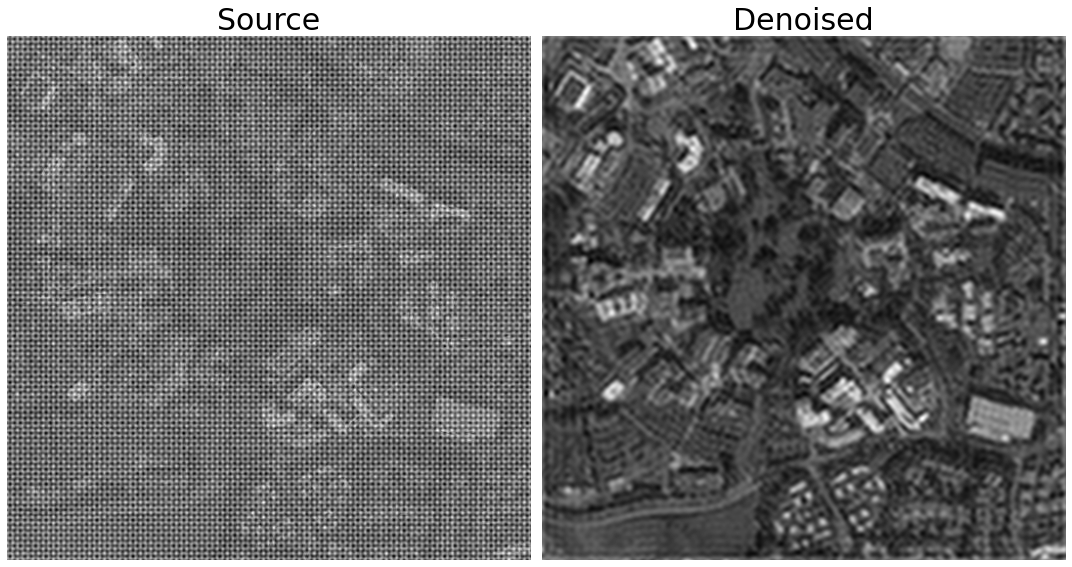

In [6]:
# Load the image 'image 2.jpg' in grayscale
image = cv2.imread('image 2.jpg', cv2.IMREAD_GRAYSCALE)

# Apply denoising
denoised_image = denoise_image(image)

# Display images side-by-side
plt.figure(figsize=(15, 10))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Source', fontsize='30')
plt.axis('off')

# Denoised image
plt.subplot(1, 2, 2)
plt.imshow(denoised_image, cmap='gray')
plt.title('Denoised', fontsize='30')
plt.axis('off')

# Show the plot
plt.tight_layout()
plt.show()